In [242]:
import pandas as pd
import matplotlib.pyplot as plt


In [243]:
orders = pd.read_csv('orders.csv')

# Showing the first 5 rows of data
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# Understand the Data:

In [244]:
orders.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [245]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [246]:
# order_id	Unique order identifier
# user_id	Unique user/customer ID
# eval_set	Type of dataset: 'prior', 'train', or 'test'
# order_number	Order sequence number for the user
# order_dow	Day of the week order was placed (0 = Sunday)
# order_hour_of_day	Hour order was placed (24-hour clock)
# days_since_prior_order	Days between orders (NaN for first orders)

In [247]:
orders.shape  # Rows, columns


(3421083, 7)

### Check for Null Values:


In [248]:
# See how many nulls per column
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [249]:
# NaNs in days_since_prior_order for a user's first order — that's normal.

### Check for Duplicates

In [250]:
# Check for fully duplicated rows
orders.duplicated().sum()

0

## Explore Initial Questions:

### How Many Orders Per Day of Week?

<Axes: xlabel='order_dow'>

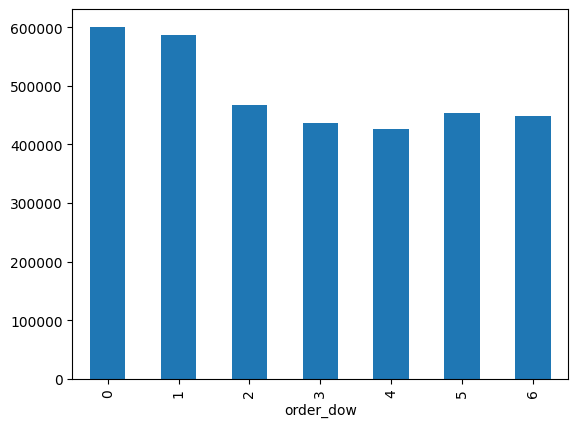

In [251]:
# This shows customer activity by day (0 = Sunday, 6 = Saturday):

orders['order_dow'].value_counts().sort_index().plot(kind='bar')


#### **Insight:**  
The highest number of orders occurs on Sunday (`order_dow = 0`) and the lowest midweek, suggesting shopping behavior peaks at the start of the week.


### Orders by Hour of Day (Peak Times):

<Axes: xlabel='order_hour_of_day'>

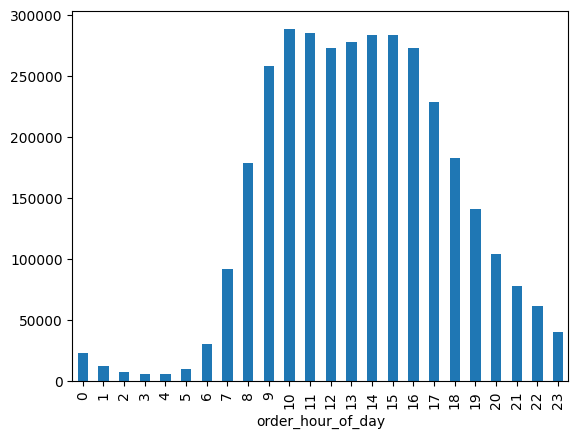

In [252]:
# Shows peak shopping hours.
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')

**Insight:**  
Order activity peaks in the late morning and early evening, which may align with meal planning or daily routines.


### Frequency of Orders by User:


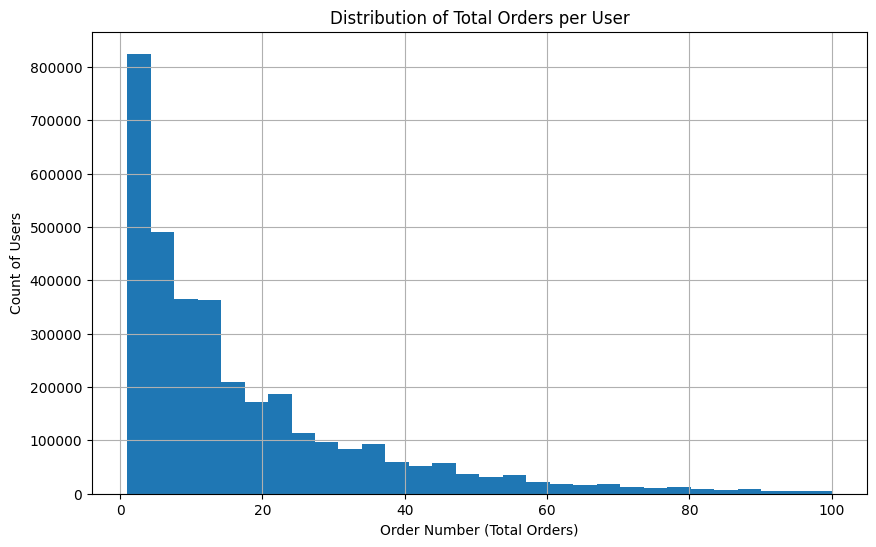

In [253]:
orders['order_number'].hist(bins=30, figsize=(10,6))
plt.title('Distribution of Total Orders per User')
plt.xlabel('Order Number (Total Orders)')
plt.ylabel('Count of Users')
plt.show()


In [254]:
### Time Between Orders (Days Since Prior Order)

In [255]:
#### How frequently are people reordering?

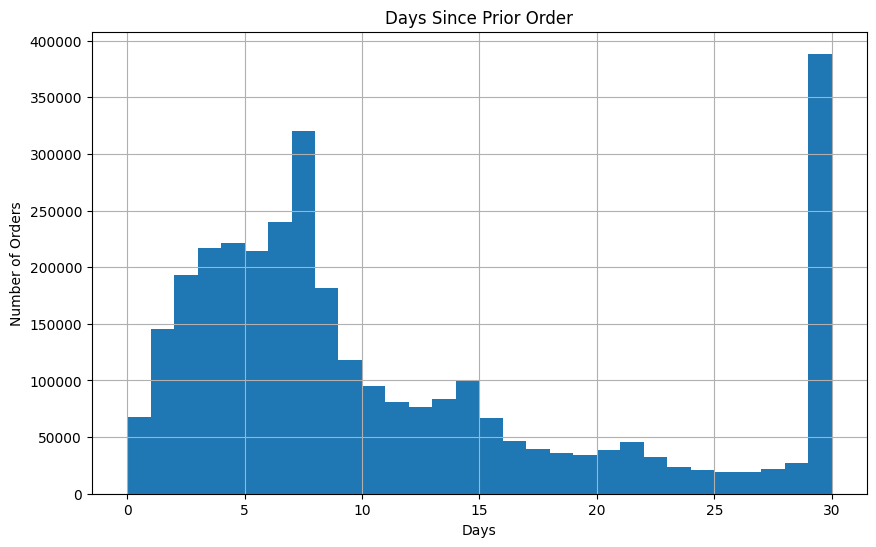

In [256]:
orders['days_since_prior_order'].hist(bins=30, figsize=(10,6))
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.show()


### Top Users by Number of Orders

#### Shows most active users — useful for understanding loyal customer segment.



In [257]:
orders.groupby('user_id')['order_number'].max().sort_values(ascending=False).head(10)


user_id
152340    100
185641    100
185524    100
81678     100
70922     100
136870    100
81704     100
119932    100
119835    100
91035     100
Name: order_number, dtype: int64

### Looking at order_products and products datasets:

In [258]:
order_products_prior = pd.read_csv('order_products__prior.csv')

# Showing the first 5 rows of data
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [259]:
order_products_prior.shape

(32434489, 4)

In [260]:
order_products_prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [261]:
order_products_prior.info()
order_products_prior.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [262]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [263]:
order_products_prior.duplicated().sum()

0

In [264]:
products = pd.read_csv('products.csv')


In [265]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [266]:
products.info()
products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [267]:
products.shape

(49688, 4)

In [268]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [269]:
products.duplicated().sum()

0

### Merge Order Products with Products Data 

In [ ]:

merged = pd.merge(order_products_prior, products, on='product_id', how='left')
merged.head()



### Top Selling Products


In [ ]:
top_products = merged['product_name'].value_counts().head(10)
print(top_products)

### Visualize Top Products

In [ ]:
top_products.plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Number of Orders')
plt.gca().invert_yaxis()
plt.show()

**Insight**
Bananas are the most purchased item, suggesting high demand for fresh produce. Retailers could target promotions or loyalty offers around these high-frequency products.

### Reorder Ratio by Product

In [ ]:
reorder_rate = merged.groupby('product_name')['reordered'].mean().sort_values(ascending=False).head(10)
print(reorder_rate)

**Insight**
Products like 'Raw Veggie Wrappers', 'Chocolte Love bar' and a energy shots have reorder rates over 90%, indicating strong customer loyalty and reliance on certain core items.

### Compare Reorder Rates Between Product Categories

In [ ]:
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')

In [ ]:
# Merge products with department and aisle info
products_full = products.merge(departments, on='department_id', how='left')
products_full = products_full.merge(aisles, on='aisle_id', how='left')

# Merge with orders data
merged_full = merged.merge(products_full[['product_id', 'department', 'aisle']], on='product_id', how='left')


In [ ]:
# Group by department to see reorder rates:

dept_reorder = merged_full.groupby('department')['reordered'].mean().sort_values(ascending=False)
print(dept_reorder)



In [ ]:
# Visualization:

In [ ]:
import matplotlib.pyplot as plt

dept_reorder.plot(kind='barh', figsize=(10,7), color='orange')
plt.title('Reorder Rates by Department')
plt.xlabel('Reorder Rate')
plt.ylabel('Department')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
### Find Products with High Sales but Low Reorders (Possible Quality Concerns)

In [ ]:
product_orders = merged.groupby('product_name').agg({
    'reordered': ['mean', 'count']
})

product_orders.columns = ['reorder_rate', 'total_orders']
product_orders = product_orders.sort_values(by='total_orders', ascending=False)

# Filter: High sales, low reorder rate
high_sales_low_reorder = product_orders[
    (product_orders['total_orders'] > 500) & (product_orders['reorder_rate'] < 0.2)
]

print(high_sales_low_reorder.head(10))


**Insight**
These are products that sell well initially but customers often don't reorder — could indicate product dissatisfaction, quality concerns, or one-time purchases.



### Analyze Reorder Patterns by Time of Day or Day of Week

In [ ]:
orders = pd.read_csv('orders.csv')

# Merge order details into main dataset
merged_full = merged_full.merge(orders[['order_id', 'order_hour_of_day', 'order_dow']], on='order_id', how='left')


In [ ]:
#  Reorder rates by hour of day:
reorder_by_hour = merged_full.groupby('order_hour_of_day')['reordered'].mean()

reorder_by_hour.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Reorder Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Reorder Rate')
plt.grid()
plt.show()


In [ ]:
# Reorder rates by day of week:
reorder_by_dow = merged_full.groupby('order_dow')['reordered'].mean()

reorder_by_dow.plot(kind='bar', color='green', figsize=(8,6))
plt.title('Reorder Rate by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Reorder Rate')
plt.show()
